In [36]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

# import dataset
df = pd.read_csv('D:\Desktop\Project\FlightSalesClean.csv')
print('loading Dataset Compelete!')

loading Dataset Compelete!


In [37]:
# change column to timedelta pandas format
df['request_time'] = pd.to_timedelta(df['request_time'].astype(str))
df['request_time']


0        12:40:00
1        12:45:00
2        13:55:00
3        15:33:00
4        15:33:00
5        16:22:00
6        16:49:00
7        19:19:00
8        19:25:00
9        19:25:00
10       19:25:00
11       19:24:00
12       19:38:00
13       19:38:00
14       20:19:00
15       20:32:23
16       21:22:00
17       22:54:00
18       22:54:00
19       22:54:00
20       22:54:00
21       22:54:00
22       22:58:00
23       22:58:00
24       23:59:00
25       23:59:00
26       23:59:00
27       00:10:00
28       00:18:00
29       05:40:00
           ...   
198784   22:25:00
198785   22:44:00
198786   22:44:00
198787   22:48:00
198788   23:13:00
198789   23:13:00
198790   23:13:00
198791   23:12:00
198792   23:12:00
198793   23:21:00
198794   23:27:00
198795   23:29:00
198796   23:29:00
198797   23:29:00
198798   23:34:00
198799   23:34:00
198800   23:34:00
198801   23:34:00
198802   23:41:00
198803   23:41:00
198804   23:46:00
198805   23:38:00
198806   23:38:00
198807   16:04:00
198808   0

In [41]:

# Round seconds and minutes
new_df = df
df['request_time'] = df['request_time'].dt.round('H')

# Count the frequency in different hours of the day
hours_frequency = df['request_time'].value_counts() # All counts of values
hours = hours_frequency.index # all times including hours and minutes and seconds

# get just the hours number
request_hour_list = []
for i in range(len(hours)):
    item = str(hours[i])
    request_hour = item[7:9]
    request_hour_list.append(int(request_hour))

request_hour_list = np.array(request_hour_list)  # list to numpy array
frequenceis = hours_frequency.to_numpy() # list to numpy array
requests_frequencies_zip = list(zip(request_hour_list, frequenceis))

requests_frequencies_zip = sorted(requests_frequencies_zip, key=lambda x: x[0]) # sort by hour
requests_frequencies_array = np.zeros([len(requests_frequencies_zip), 2], dtype='int') # list of tuples to numpy array

for i in range(len(requests_frequencies_zip)):
    requests_frequencies_array[i][0] = requests_frequencies_zip[i][0]
    requests_frequencies_array[i][1] = requests_frequencies_zip[i][1]

requests_frequencies_array[0][0] = 24 # seprate 0 from 24 # solve hour 0 problem
requests_frequencies_array = requests_frequencies_array[requests_frequencies_array[:,0].argsort()]

#max and min of requests
max_requests_frequencies_array = np.max(requests_frequencies_array[:, 1])
print('Max of requests in months of the years is = ', max_requests_frequencies_array)

min_requests_frequencies_array = np.min(requests_frequencies_array[:, 1])
print('Min of requests in months of the years is = ', min_requests_frequencies_array)

Max of requests in months of the years is =  15876
Min of requests in months of the years is =  344


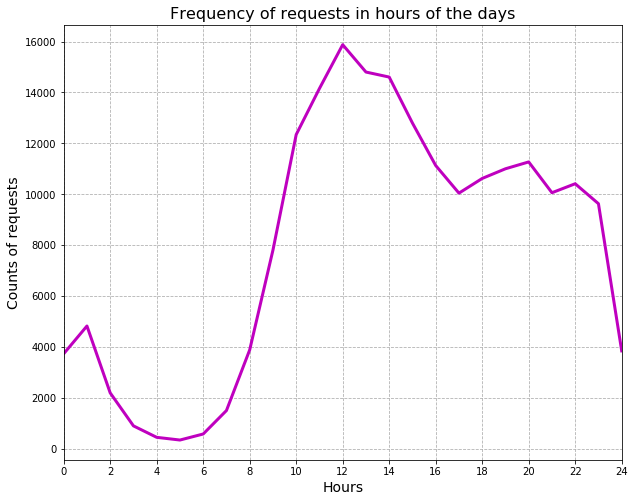

<Figure size 720x576 with 0 Axes>

In [42]:
requests_frequencies_array = requests_frequencies_array.T  # transpose numpy array for plotting
plt.plot(requests_frequencies_array[0], requests_frequencies_array[1], color = 'm', linewidth = 3)
plt.grid(b=None, which='major' , axis='both' ,linestyle='--')
plt.title('Frequency of requests in hours of the days', fontsize = 16)
plt.xlabel('Hours', fontsize = 14)
plt.ylabel('Counts of requests', fontsize = 14)
plt.xlim([0,24])
plt.xticks([i for i in range(0,25,2)])
plt.gcf().set_size_inches(10,8)
plt.figure(figsize=(10,8))
plt.show()

In [43]:
# set the correct format of dataframe
new_df = pd.to_datetime(df['request_date_id'], format="%Y%m%d")

# date to week days
new_df['day_of_week'] = new_df.dt.day_name()
new_df['day_of_week']
list_of_days = new_df['day_of_week'].to_numpy()

days_frequency = new_df['day_of_week'].value_counts()  # All counts of values
days = days_frequency.index # all times including hours and minutes and seconds

# get just the hours number
request_days_list = []
for i in range(len(days)):
    item = str(days[i])
    request_days_list.append(item)
request_days_list = np.array(request_days_list)  # list to numpy array
frequenceis = days_frequency.to_numpy() # list to numpy array
requests_frequencies_zip = list(zip(request_days_list, frequenceis))

requests_frequencies_zip = sorted(requests_frequencies_zip, key=lambda x: x[1]) # sort by hour

requests_frequencies_dict = {} # dictionary of items
for i in range(len(requests_frequencies_zip)):
    requests_frequencies_dict[requests_frequencies_zip[i][0]] = int(requests_frequencies_zip[i][1])

#max and min of requests
import operator

max_requests_frequencies_dict = max(requests_frequencies_dict.items(), key=operator.itemgetter(1))[0]
print('Max of requests in days of the weeks is in', max_requests_frequencies_dict)

min_requests_frequencies_dict = min(requests_frequencies_dict.items(), key=operator.itemgetter(1))[0]
print('Min of requests in days of the weeks is in', min_requests_frequencies_dict)



Max of requests in days of the weeks is in Saturday
Min of requests in days of the weeks is in Friday


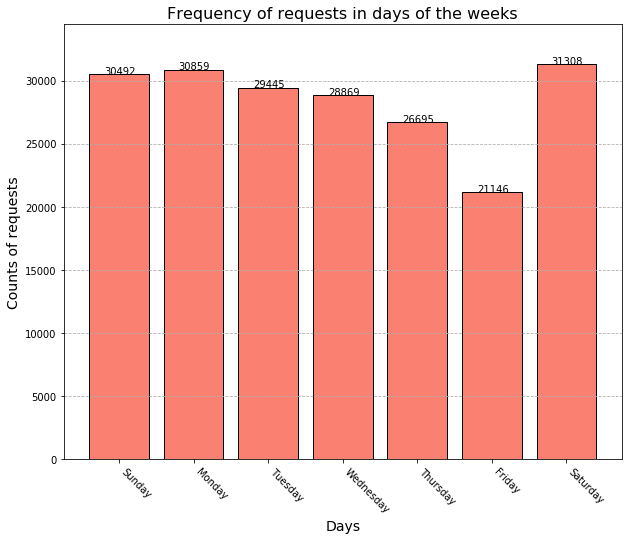

In [44]:
list_to_plot_x = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
list_to_plot_y = []
for item in list_to_plot_x:
    list_to_plot_y.append(requests_frequencies_dict[item])

# plot
plt.bar(list_to_plot_x, list_to_plot_y, color = 'salmon', edgecolor = 'black')
plt.grid(b=None, which='major' , axis='y',linestyle='--')
plt.xticks(rotation=-45, ha='left')
plt.title('Frequency of requests in days of the weeks', fontsize = 16)
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Counts of requests', fontsize = 14)
plt.gcf().set_size_inches(10,8)
plt.ylim([0, max(list_to_plot_y)*1.1])
list_to_plot_y = np.around(list_to_plot_y, 1)
for i, v in enumerate(list_to_plot_y):
    plt.text(i-0.2, v+2, str(v), color='black')
plt.show()


In [45]:

# set the correct format of dataframe
new_df = pd.to_datetime(df['departure_date_id'], format="%Y%m%d")

# date to week days
new_df['day_of_week'] = new_df.dt.day_name()
list_of_days = new_df['day_of_week'].to_numpy()

days_frequency = new_df['day_of_week'].value_counts()  # All counts of values
days = days_frequency.index # all times including hours and minutes and seconds

# get just the hours number
request_days_list = []
for i in range(len(days)):
    item = str(days[i])
    request_days_list.append(item)
request_days_list = np.array(request_days_list)  # list to numpy array
frequenceis = days_frequency.to_numpy() # list to numpy array
requests_frequencies_zip = list(zip(request_days_list, frequenceis))

requests_frequencies_zip = sorted(requests_frequencies_zip, key=lambda x: x[1]) # sort by hour

requests_frequencies_dict = {} # dictionary of items
for i in range(len(requests_frequencies_zip)):
    requests_frequencies_dict[requests_frequencies_zip[i][0]] = int(requests_frequencies_zip[i][1])
list_to_plot_x = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
list_to_plot_y = []
for item in list_to_plot_x:
    list_to_plot_y.append(requests_frequencies_dict[item])


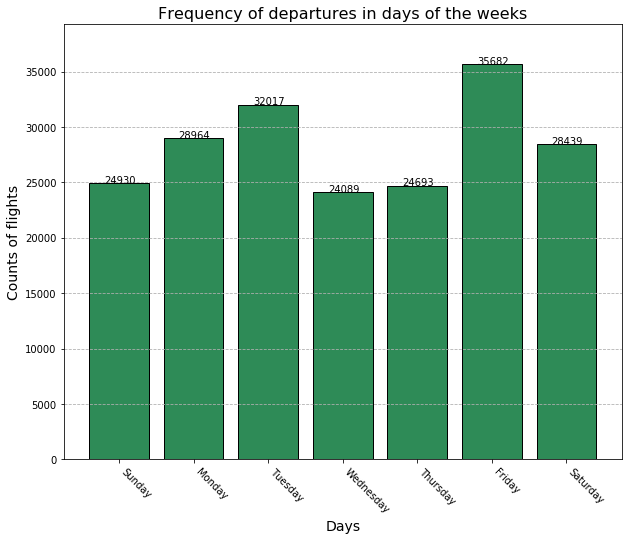

In [46]:
# plot
plt.bar(list_to_plot_x, list_to_plot_y, color = 'seagreen', edgecolor = 'black')
plt.grid(b=None, which='major' , axis='y',linestyle='--')
plt.xticks(rotation=-45, ha='left')
plt.title('Frequency of departures in days of the weeks', fontsize = 16)
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Counts of flights', fontsize = 14)
plt.gcf().set_size_inches(10,8)
plt.ylim([0, max(list_to_plot_y)*1.1])
list_to_plot_y = np.around(list_to_plot_y, 1)
for i, v in enumerate(list_to_plot_y):
    plt.text(i-0.2, v+2, str(v), color='black')
plt.show()


In [47]:

# set the correct format of dataframe
month_df = pd.to_datetime(df['request_date_id'], format="%Y%m%d")

# date to week days
month_df['month_of_year'] = month_df.dt.month_name()
month_df['month_of_year']
list_of_month = month_df['month_of_year'].to_numpy()

months_frequency = month_df['month_of_year'].value_counts() # All counts of values
months = months_frequency.index # all times including hours and minutes and seconds

# get just the hours number
request_month_list = []
for i in range(len(months)):
    item = str(months[i])
    request_month_list.append(item)
request_month_list = np.array(request_month_list)  # list to numpy array

frequenceis = months_frequency.to_numpy() # list to numpy array

requests_frequencies_zip = list(zip(request_month_list, frequenceis))

requests_frequencies_zip = sorted(requests_frequencies_zip, key=lambda x: x[1]) # sort by hour

requests_frequencies_dict = {} # dictionary of items
for i in range(len(requests_frequencies_zip)):
    requests_frequencies_dict[requests_frequencies_zip[i][0]] = int(requests_frequencies_zip[i][1])
#max and min of requests


max_requests_frequencies_dict = max(requests_frequencies_dict.items(), key=operator.itemgetter(1))[0]
print('Max of requests in months of the years is in', max_requests_frequencies_dict)

min_requests_frequencies_dict = min(requests_frequencies_dict.items(), key=operator.itemgetter(1))[0]
print('Min of requests in months of the years is in', min_requests_frequencies_dict)



Max of requests in months of the years is in January
Min of requests in months of the years is in April


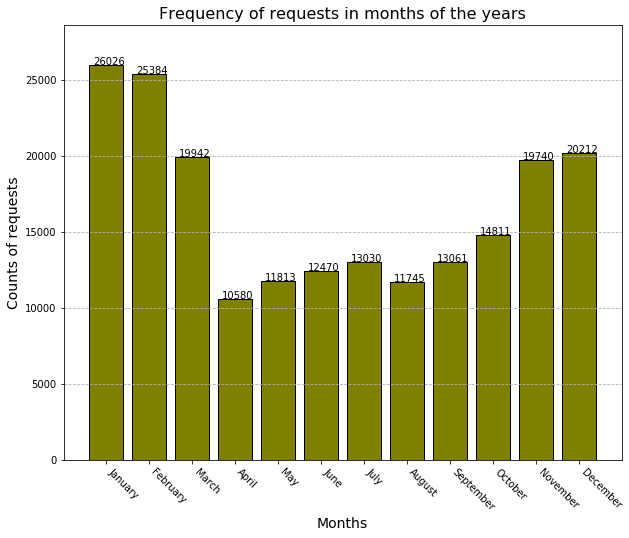

<Figure size 1440x720 with 0 Axes>

In [48]:
list_to_plot_x = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
list_to_plot_y = []
for item in list_to_plot_x:
    list_to_plot_y.append(requests_frequencies_dict[item])

# plot
plt.bar(list_to_plot_x, list_to_plot_y, color = 'olive', edgecolor = 'black')
plt.grid(b=None, which='major' , axis='y',linestyle='--')
plt.xticks(rotation=-45, ha='left')
plt.ylim([0, max(list_to_plot_y)*1.1])
list_to_plot_y = np.around(list_to_plot_y, 1)
for i, v in enumerate(list_to_plot_y):
    plt.text(i-0.3, v+3, str(v), color='black')
plt.title('Frequency of requests in months of the years', fontsize = 16)
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Counts of requests', fontsize = 14)
plt.gcf().set_size_inches(10,8)
plt.figure(figsize=(20,10))
plt.show()

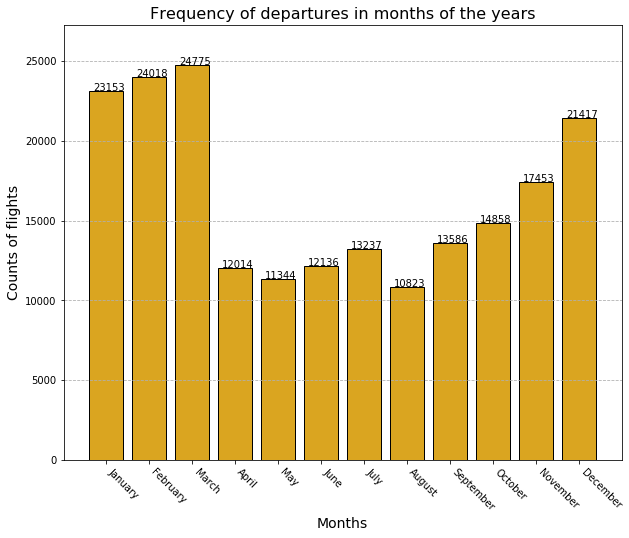

<Figure size 1440x720 with 0 Axes>

In [49]:

# set the correct format of dataframe
month_df = pd.to_datetime(df['departure_date_id'], format="%Y%m%d")

# date to week days
month_df['month_of_year'] = month_df.dt.month_name()
month_df['month_of_year']
list_of_month = month_df['month_of_year'].to_numpy()

months_frequency = month_df['month_of_year'].value_counts() # All counts of values
months = months_frequency.index # all times including hours and minutes and seconds

# get just the hours number
request_month_list = []
for i in range(len(months)):
    item = str(months[i])
    request_month_list.append(item)
request_month_list = np.array(request_month_list)  # list to numpy array

frequenceis = months_frequency.to_numpy() # list to numpy array

requests_frequencies_zip = list(zip(request_month_list, frequenceis))

requests_frequencies_zip = sorted(requests_frequencies_zip, key=lambda x: x[1]) # sort by hour

requests_frequencies_dict = {} # dictionary of items
for i in range(len(requests_frequencies_zip)):
    requests_frequencies_dict[requests_frequencies_zip[i][0]] = int(requests_frequencies_zip[i][1])

list_to_plot_x = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
list_to_plot_y = []
for item in list_to_plot_x:
    list_to_plot_y.append(requests_frequencies_dict[item])

# plot
plt.bar(list_to_plot_x, list_to_plot_y, color = 'goldenrod', edgecolor = 'black')
plt.grid(b=None, which='major' , axis='y',linestyle='--')
plt.xticks(rotation=-45, ha='left')
plt.ylim([0, max(list_to_plot_y)*1.1])
list_to_plot_y = np.around(list_to_plot_y, 1)
for i, v in enumerate(list_to_plot_y):
    plt.text(i-0.3, v+3, str(v), color='black')
plt.title('Frequency of departures in months of the years', fontsize = 16)
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Counts of flights', fontsize = 14)
plt.gcf().set_size_inches(10,8)
plt.figure(figsize=(20,10))
plt.show()